In [2]:
import requests
import time
import datetime
import json
import plotly.graph_objects as go
url_base='https://www.bseindia.com'
url1='https://api.bseindia.com/RealTimeBseIndiaAPI/api/GetSensexData/w'
#sensex io
url2='https://api.bseindia.com/BseIndiaAPI/api/DerivOptionChain/w?Expiry=19+May+2023&ProductType=IO&scrip_cd=1' 
#bankex io
url3='https://api.bseindia.com/BseIndiaAPI/api/DerivOptionChain/w?Expiry=19+May+2023&ProductType=IO&scrip_cd=12'
# sx50 io
url4='https://api.bseindia.com/BseIndiaAPI/api/DerivOptionChain/w?Expiry=18+May+2023&ProductType=IO&scrip_cd=47'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36','accept-language': 'en,gu;q=0.9,hi;q=0.8','accept-encoding': 'gzip, deflate, br'}
# get_expiry
url_expiry='https://api.bseindia.com/BseIndiaAPI/api/ddlExpiry/w?ProductType=IO&scrip_cd=1'
# product_type
product_url='https://api.bseindia.com/BseIndiaAPI/api/ddlUnderlyingAsset/w?ProductType=IO&scrip_cd=0'

In [3]:
sess=requests.Session()
response=sess.get(url=url_base, headers=headers, timeout=15)
cookies=response.cookies
option_chain=sess.get(url=url2, headers=headers, cookies=cookies, timeout=15)
data_chain=option_chain.json()

In [126]:
option_chain.json()

{'Table': [{'C_Series_Code': 'SENSEX2351960000CE',
   'C_Open_Interest': None,
   'C_Absolute_Change_OI': None,
   'C_Last_Trd_Price': None,
   'C_NetChange': None,
   'C_Vol_Traded': None,
   'C_BIdQty': None,
   'C_BidPrice': None,
   'C_OfferPrice': None,
   'C_OfferQty': None,
   'C_Series_Id': 872087,
   'Strike_Price': 60000.0,
   'ScriP_cd': 1,
   'Series_Id': 871436,
   'BIdQty': None,
   'BidPrice': None,
   'OfferPrice': None,
   'OfferQty': None,
   'Vol_Traded': None,
   'Last_Trd_Price': None,
   'NetChange': None,
   'Absolute_Change_OI': None,
   'Open_Interest': None,
   'Ula_Code': 'SENSEX',
   'End_TimeStamp': '19 May 2023',
   'Product_Type': 'Index Option',
   'p_Series_Code': 'SENSEX2351960000PE',
   'SCRIP_ID': 'BSX',
   'C_SCRIP_ID': 'BSX',
   'comapny_name': 'SENSEX              ',
   'C_comapny_name': 'SENSEX              ',
   'UlaValue': 62345.71},
  {'C_Series_Code': 'SENSEX2351960100CE',
   'C_Open_Interest': None,
   'C_Absolute_Change_OI': None,
   'C_Las

In [36]:
class BSEOIFetch:
    def __init__(self, index='SENSEX'):
        self.index=index
        self.data_mapper={'IO':{'SENSEX':1, 'BANKEX':12, 'SX50':47}}
        self.expiry_url=f'https://api.bseindia.com/BseIndiaAPI/api/ddlExpiry/w?ProductType=IO&scrip_cd={self.data_mapper["IO"][self.index]}'
        self.product_url='https://api.bseindia.com/BseIndiaAPI/api/ddlUnderlyingAsset/w?ProductType=IO&scrip_cd=0'
        self.base_url='https://www.bseindia.com'
        self.headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36','accept-language': 'en,gu;q=0.9,hi;q=0.8','accept-encoding': 'gzip, deflate, br'}
        self.index_expiry=self.index_expiry()
        self.index_url=f'https://api.bseindia.com/BseIndiaAPI/api/DerivOptionChain/w?Expiry={self.index_expiry}&ProductType=IO&scrip_cd={self.data_mapper["IO"][self.index]}'
    def index_expiry(self):
        sess=requests.Session()
        response=sess.get(url=self.base_url, headers=self.headers, timeout=10)
        cookies=response.cookies
        expiry_dates=sess.get(url=self.expiry_url, headers=self.headers, cookies=cookies, timeout=10)
        expiry_date=expiry_dates.json()['Table'][0]['eXPIRY']
        formatted_expiry_date=expiry_date[0:2]+'+'+expiry_date[3:6]+'+'+expiry_date[7:]
        return formatted_expiry_date
    def fetch_data(self):
        sess=requests.Session()
        response=sess.get(url=self.base_url, headers=self.headers, timeout=10)
        cookies=response.cookies
        output=sess.get(url=self.index_url, headers=self.headers, cookies=cookies, timeout=10)
        data=output.json()['Table']
        return data
    def plot_data(self):
        data=self.fetch_data()
        x=[item['Strike_Price'] for item in data]
        y1=[item['C_Open_Interest'] for item in data]
        y2=[item['Open_Interest'] for item in data]
        y3=[item['C_Last_Trd_Price'] for item in data]
        y4=[item['Last_Trd_Price'] for item in data]
        fig=go.Figure()
        fig.add_trace(go.Bar(x=x, y=y1, name='Call Open Interest'))
        fig.add_trace(go.Bar(x=x, y=y2, name='Put Open Interest'))
        fig.add_trace(go.Scatter(x=x, y=y3, name='Call Price', mode='lines+markers'))
        fig.add_trace(go.Scatter(x=x, y=y4, name='Put Price', mode='lines+markers'))
        fig.update_layout(barmode='group')
        fig.show()

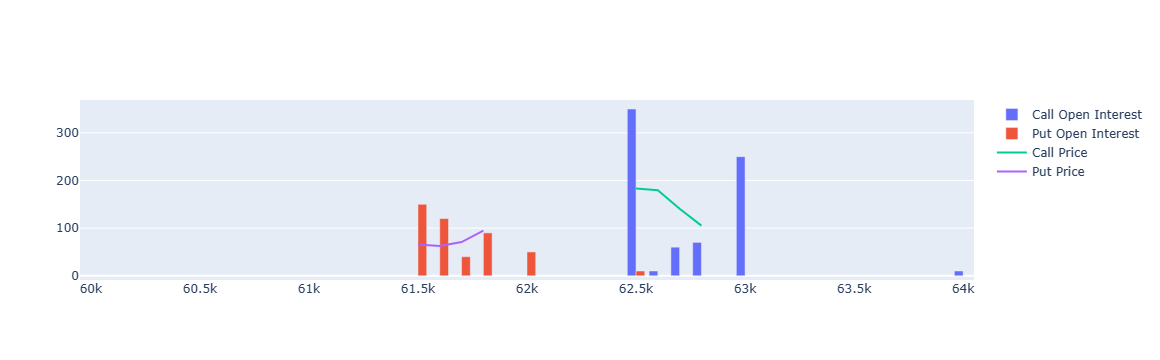

In [53]:
BSEOIFetch().plot_data()

In [39]:
import dash
from dash.dependencies import Input, Output
from dash import dcc, html

Dropdown(options=('SENSEX', 'BANKEX', 'SX50'), value='SENSEX')

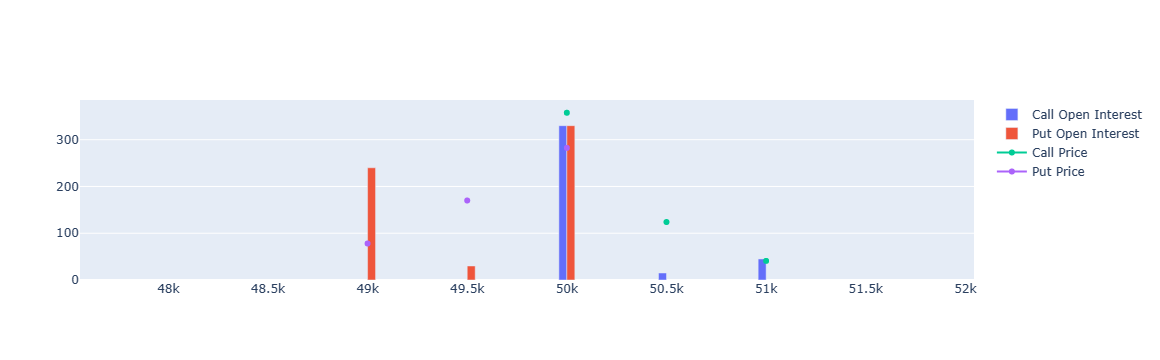

In [51]:
import plotly.graph_objs as go
from ipywidgets import Dropdown
from IPython.display import display

data_class = BSEOIFetch()
options = list(data_class.data_mapper["IO"].keys())
dropdown = Dropdown(options=options)
display(dropdown)

fig = go.FigureWidget()
data=data_class.fetch_data()
x=[item['Strike_Price'] for item in data]
y1=[item['C_Open_Interest'] for item in data]
y2=[item['Open_Interest'] for item in data]
y3=[item['C_Last_Trd_Price'] for item in data]
y4=[item['Last_Trd_Price'] for item in data]
fig=go.Figure()
fig.add_trace(go.Bar(x=x, y=y1, name='Call Open Interest'))
fig.add_trace(go.Bar(x=x, y=y2, name='Put Open Interest'))
fig.add_trace(go.Scatter(x=x, y=y3, name='Call Price', mode='lines+markers'))
fig.add_trace(go.Scatter(x=x, y=y4, name='Put Price', mode='lines+markers'))
fig.update_layout(barmode='group')
fig.show()

def update_graph(change):
    data = BSEOIFetch(change.new).fetch_data()
    x = [item['Strike_Price'] for item in data]
    y1 = [item['C_Open_Interest'] for item in data]
    y2 = [item['Open_Interest'] for item in data]
    y3 = [item['C_Last_Trd_Price'] for item in data]
    y4 = [item['Last_Trd_Price'] for item in data]
    fig.data[0].x = x
    fig.data[0].y = y1
    fig.data[1].x = x
    fig.data[1].y = y2
    fig.data[2].x = x
    fig.data[2].y = y3
    fig.data[3].x = x
    fig.data[3].y = y4

dropdown.observe(update_graph, names='value')